
# SetUp:

In [1]:
name = 'Mike'

In [2]:

# before importing tensorflow backend
from __future__ import print_function
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
# -*- coding: utf-8 -*-

import os

# classify single picture:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

import easygui
import ast

---
# open file from gui:

In [16]:

###############################################################################
#easygui.egdemo()
#pic = easygui.fileopenbox()
###############################################################################
pic = r'' + name + '\\validation_set\Car\Car7.png'

---
# show image

<Figure size 800x800 with 0 Axes>

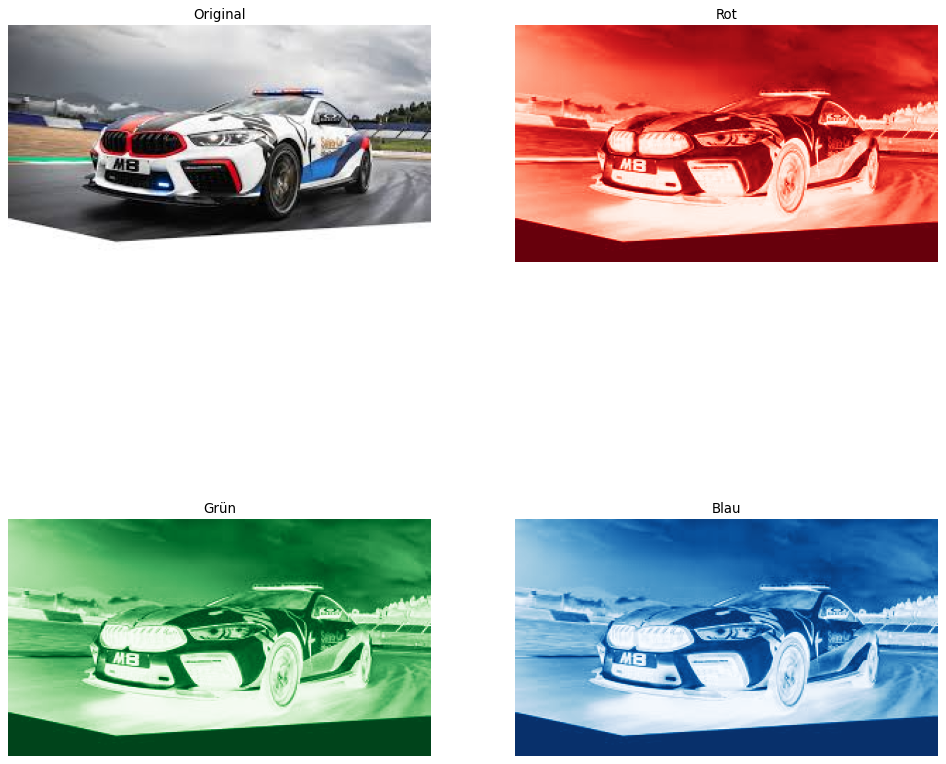

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import math
import cv2

figure(num=None, figsize=(10, 10), dpi=80, edgecolor='k')
#img=mpimg.imread(pic)
img=cv2.imread(pic)
#plt.imshow(img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img_rgb)

titles = ['Original', 'Rot', 'Grün', 'Blau']
images = [cv2.merge((r,g,b)), r, g, b]
cmaps = [None, 'Reds', 'Greens', 'Blues']

figure(num=None, figsize=(15, 15), dpi=80, edgecolor='k')
for i in range(len(images)):
    plt.subplot(math.sqrt(len(images)),math.sqrt(len(images)),i+1)
    plt.imshow(images[i], cmap = cmaps[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
plt.show()


---
# load model

In [6]:
checkpoint_dir = name + "/checkpoints"
loaded_model = load_model(checkpoint_dir + "/cnn_model.hdf5")
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 16,828,739
Trainable params: 2,114,051
Non-trainable params: 14,714,688
_________________________________________________________________


---
# predict picture

In [7]:

###############################################s################################
from tensorflow.keras import backend as K
import tensorflow
#sess = K.get_session()

test_image = image_utils.load_img(pic, target_size = (150,150))
test_image = np.expand_dims(test_image, axis = 0)
test_image = K.reshape(test_image, [1,150,150,3])

#result = loaded_model.predict_on_batch(test_image.eval(session = sess))
result = loaded_model.predict_on_batch(test_image)
#result = loaded_model.predict(test_image,steps = 0)#.eval(session = sess))

#training_set.class_indices
#classes = training_set.class_indices
#classes = {'Bademantel': 0, 'Businessanzug': 1, 'Judoanzug': 2}
print(result)
f = open(name + '/classes.txt', 'r')
classes = ast.literal_eval(f.read())
f.close()
#Vorhersage:

#result_list = result[0].tolist()
result_list = result[0].numpy().tolist()
print(result_list)
class_index = result_list.index(max(result_list))
prediction = list(classes)[class_index]
probabs = pd.DataFrame(columns = classes, index = range(1))
probabs.loc[0] = result[0].numpy().tolist()

print(prediction)
print(probabs)


tf.Tensor([[1.000000e+00 0.000000e+00 1.414791e-36]], shape=(1, 3), dtype=float32)
[1.0, 0.0, 1.4147910179288027e-36]
Car
  Car Laptop   Smartphone
0   1      0  1.41479e-36
